In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\eakaagg\\Desktop\\Mute_Project\\mute.csv')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print(data.columns.values)

Number of data points :  287361
Number of features :  44
['EUtranCell' 'CSSR NOM' 'CSSR DENOM' 'CSSR %' 'Volte Drop Nom'
 'Volte Drop Denom' 'Volte Drop Rate' 'PACKET LOSS DL NOM'
 'PACKET LOSS DL DENOM' 'Paket Loss DL %' 'Packet loss UL NOm'
 'Packet loss UL Denom' 'Packet loss UL %' 'Intra HO EXEC  Nom'
 'Intra HO EXEC Denom' 'Intra Ho Exec Succ Rate' 'Inter Freq HoExe Nom'
 'Inter Freq Hoexe Denom' 'VoLTE Inter-Frequency Handover Success Ratio'
 'SRVCC EXE Succ' 'SRVCC EXE Att' 'SRVCC Execution Success to Utran (%)'
 'VoLTE SRVCC IRAT Per call NOm' 'VoLTE SRVCC IRAT Per call Denom'
 'VoLTE SRVCC IRAT Per cal rate' 'CRE NOm' 'CRE Denom'
 'VoLTE RRC Re-establishment Success (%)' 'CRE RAte NOm' 'CRE Rate Denom'
 'CRE rate' 'Silent experience per VoLTE user (ms)' 'Volte Traffic(ERL)'
 'Volte Traffic(MB)' 'SRVCC prep Succ' 'SRVCC prep Att'
 'SRVCC Preparation Success to Utran (%)' 'pmErabRelAbnormalEnbActCdtQCI1'
 'pmErabRelAbnormalEnbActHoQCI1' 'pmErabRelAbnormalEnbActHprQCI1'
 'pmErabR

In [3]:
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
#percent.describe()
percent = round(percent,2)
print(percent)
data1 = data[data.columns[data.isnull().mean() < 0.3]]
print("data.shape is", data1.shape)
percent1 = ((data1.isnull().sum()/data1.isnull().count())*100).sort_values(ascending = False)
print(percent1)

pmErabRelAbnormalEnbActTnFailQci1               99.97
pmErabRelAbnormalEnbActHprQCI1                  99.85
pmErabRelAbnormalEnbActCdtQCI1                  99.57
pmErabRelAbnormalEnbActHoQCI1                   95.84
pmErabRelAbnormalEnbActUeLostQci1               93.74
Volte Drop Rate                                 89.02
Volte Drop Nom                                  88.93
SRVCC Execution Success to Utran (%)            72.50
SRVCC Preparation Success to Utran (%)          72.04
Silent experience per VoLTE user (ms)           50.13
CRE rate                                        40.17
VoLTE RRC Re-establishment Success (%)          40.13
CRE NOm                                         40.13
CRE RAte NOm                                    39.89
CRE Denom                                       39.89
VoLTE Inter-Frequency Handover Success Ratio    39.79
Packet loss UL %                                 9.38
Packet loss UL NOm                               9.32
Volte Drop Denom            

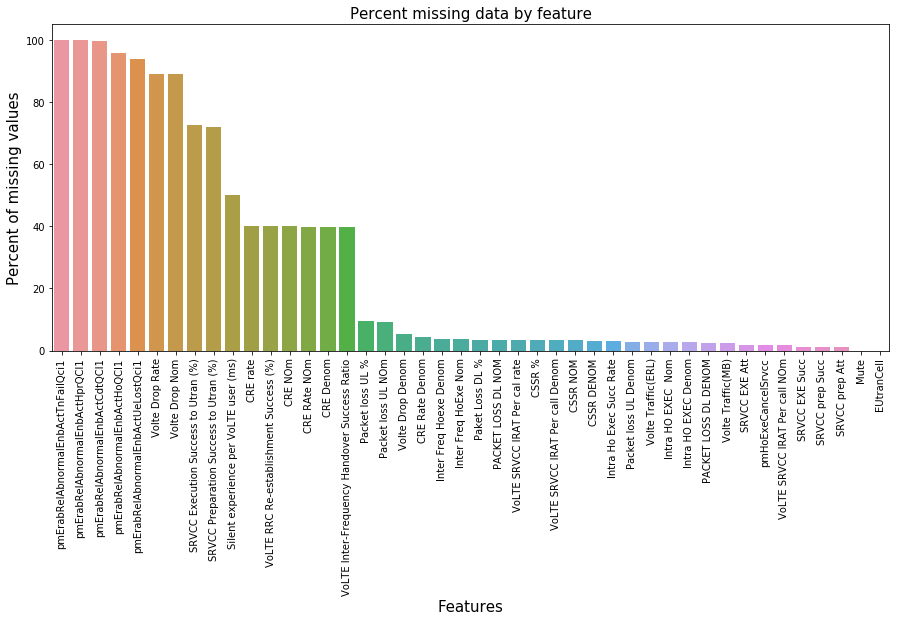

In [4]:
total = data.isnull().sum().sort_values(ascending=False)
#percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

In [5]:
data_pca = data1.drop(['Mute','EUtranCell'], axis=1)
data_pca = data_pca.fillna(value = 0)
print(data_pca.shape)
print(data_pca.isnull().sum())

(287361, 26)
CSSR NOM                           0
CSSR DENOM                         0
CSSR %                             0
Volte Drop Denom                   0
PACKET LOSS DL NOM                 0
PACKET LOSS DL DENOM               0
Paket Loss DL %                    0
Packet loss UL NOm                 0
Packet loss UL Denom               0
Packet loss UL %                   0
Intra HO EXEC  Nom                 0
Intra HO EXEC Denom                0
Intra Ho Exec Succ Rate            0
Inter Freq HoExe Nom               0
Inter Freq Hoexe Denom             0
SRVCC EXE Succ                     0
SRVCC EXE Att                      0
VoLTE SRVCC IRAT Per call NOm      0
VoLTE SRVCC IRAT Per call Denom    0
VoLTE SRVCC IRAT Per cal rate      0
CRE Rate Denom                     0
Volte Traffic(ERL)                 0
Volte Traffic(MB)                  0
SRVCC prep Succ                    0
SRVCC prep Att                     0
pmHoExeCancelSrvcc                 0
dtype: int64


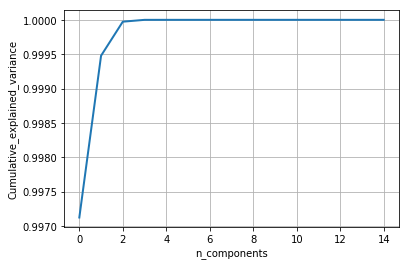

In [6]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 15
pca_data = pca.fit_transform(data_pca)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [7]:

data1 = data1.fillna(value = 0)
X = data1.iloc[:,1:28]
y = data1.iloc[:,-1]

In [8]:
from sklearn import model_selection
validation_size = 0.20
y_true = X['Mute'].values
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, stratify=y_true, random_state=seed)

C:\Users\eakaagg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """Entry point for launching an IPython kernel.
C:\Users\eakaagg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  


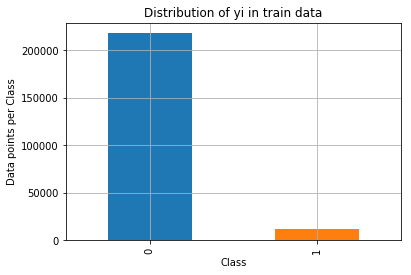

In [15]:
train_class_distribution = X_train['Mute'].value_counts().sortlevel()
test_class_distribution = X_validation['Mute'].value_counts().sortlevel()


my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [10]:
data1 = data1.fillna(value = 0)
from sklearn.utils import resample
df_majority = data1[data1.Mute==0]
df_minority = data1[data1.Mute==1]
print(df_majority.shape)
print(df_minority.shape)
df_minority_upsampled = resample(df_minority, replace=True, n_samples=272313, random_state=123)
print(df_minority_upsampled.shape)
data1 = pd.concat([df_majority, df_minority_upsampled])
print(data1.shape)
'''X = data1.iloc[:,1:28]
y = data1.iloc[:,-1]
print(X.columns.values)
print(y.iloc[0])
my_colors = 'rgbkymc'
data1.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()'''

(272313, 28)
(15048, 28)
(272313, 28)
(544626, 28)


"X = data1.iloc[:,1:28]\ny = data1.iloc[:,-1]\nprint(X.columns.values)\nprint(y.iloc[0])\nmy_colors = 'rgbkymc'\ndata1.plot(kind='bar')\nplt.xlabel('Class')\nplt.ylabel('Data points per Class')\nplt.title('Distribution of yi in train data')\nplt.grid()\nplt.show()"

In [11]:
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 


C:\Users\eakaagg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


LR: 0.988890 (0.001975)
KNN: 0.965070 (0.000933)
NB: 0.926007 (0.001377)


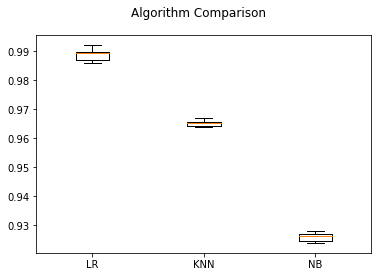

In [12]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
'''Logistic Regression'''

LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
score = LR.score(X_validation, Y_validation)
print(score)
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print ('LR CONFUSION MATRIX')
print(confusion_df)

'''naive bayes classifier'''

NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
score = NB.score(X_validation, Y_validation)
print(score)
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print ('GB CONFUSION MATRIX')
print(confusion_df)


'''SUPPORT VECTOR MACHINE WITH MULTIPLE KERNAL'''

'''svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, Y_train) 
predictions = svclassifier.predict(X_validation)
score = svclassifier.score(X_validation, Y_validation)
print(score)
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print(confusion_df)

'svclassifier = SVC(kernel='poly',degree =8)  
svclassifier.fit(X_train, Y_train) 
predictions = svclassifier.predict(X_validation)
score = svclassifier.score(X_validation, Y_validation)
print(score)
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print ('SVC CONFUSION MATRIX')
print(confusion_df)'''

0.9920658396116437
LR CONFUSION MATRIX
         Predicted Class 0  Predicted Class 1
Class 0              54452                 11
Class 1                445               2565
0.9259826353244132
GB CONFUSION MATRIX
         Predicted Class 0  Predicted Class 1
Class 0              52418               2045
Class 1               2209                801


'svclassifier = SVC(kernel=\'linear\')  \nsvclassifier.fit(X_train, Y_train) \npredictions = svclassifier.predict(X_validation)\nscore = svclassifier.score(X_validation, Y_validation)\nprint(score)\nconfusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),\n             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],\n             index = ["Class " + str(class_name) for class_name in [0,1]])\nprint(confusion_df)\n\n\'svclassifier = SVC(kernel=\'poly\',degree =8)  \nsvclassifier.fit(X_train, Y_train) \npredictions = svclassifier.predict(X_validation)\nscore = svclassifier.score(X_validation, Y_validation)\nprint(score)\nconfusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),\n             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],\n             index = ["Class " + str(class_name) for class_name in [0,1]])\nprint (\'SVC CONFUSION MATRIX\')\nprint(confusion_df)'

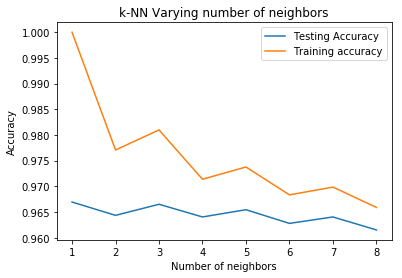

0.9627825239677762
KNN CONFUSION MATRIX
         Predicted Class 0  Predicted Class 1
Class 0              54361                102
Class 1               2037                973


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, Y_train)
    
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_validation, Y_validation)


plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
#print(confusion_matrix(Y_validation, predictions))

print ('KNN CONFUSION MATRIX')
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print(confusion_df)
List = np.column_stack([X_validation, predictions,Y_validation]).tolist()
#predit_df=pd.DataFrame(List,columns=['Answered_Calls','De_Registrations','Total_Users','Initial_Registrations','Call_Attempts','Mean_Holding_Time','Re_Registrations','Total_SMS','Predcited CPU load','current_cpuload'])
#predit_df=pd.DataFrame(List,columns=['Answered_Calls','De_Registrations','Total_Users','Initial_Registrations','Call_Attempts','Mean_Holding_Time','Re_Registrations','Predcited CPU load','current_cpuload'])
#predit_df=pd.DataFrame(List,columns=['Answered_Calls','De_Registrations','Total_Users','Initial_Registrations','Call_Attempts','Predcited CPU load','current_cpuload'])
print(List)

from sklearn.metrics import f1_score
print(f1_score(Y_validation, predictions, average=None))

In [60]:
''''from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(Y_validation, predictions, average=None))
x_macro = f1_score(Y_validation, predictions, average='macro')
x_micro = f1_score(Y_validation, predictions, average='micro')
x_weighted = f1_score(Y_validation, predictions, average='weighted')
x_none = f1_score(Y_validation, predictions, average=None)
print("f1 none is", x_none, "f1_macro is ",x_macro,"f1_micro is ",x_micro, "f1_weighted is ",x_weighted)''''''

(array([1.        , 0.96756027]), array([0.96647265, 1.        ]), array([0.98295051, 0.98351271]), array([54463, 54463], dtype=int64))
f1 none is [0.98295051 0.98351271] f1_macro is  0.9832316133137258 f1_micro is  0.9832363255788333 f1_weighted is  0.9832316133137258


In [17]:
RF = RandomForestClassifier(n_jobs=2,n_estimators=50)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
score = RF.score(X_validation, Y_validation)
print(score)
confusion_df = pd.DataFrame(confusion_matrix(Y_validation,predictions),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])
print ('RF CONFUSION MATRIX')
print(confusion_df)


1.0
RF CONFUSION MATRIX
         Predicted Class 0  Predicted Class 1
Class 0              54463                  0
Class 1                  0               3010


['EUtranCell' 'CSSR NOM' 'CSSR DENOM' 'CSSR %' 'Volte Drop Denom'
 'PACKET LOSS DL NOM' 'PACKET LOSS DL DENOM' 'Paket Loss DL %'
 'Packet loss UL NOm' 'Packet loss UL Denom' 'Packet loss UL %'
 'Intra HO EXEC  Nom' 'Intra HO EXEC Denom' 'Intra Ho Exec Succ Rate'
 'Inter Freq HoExe Nom' 'Inter Freq Hoexe Denom' 'SRVCC EXE Succ'
 'SRVCC EXE Att' 'VoLTE SRVCC IRAT Per call NOm'
 'VoLTE SRVCC IRAT Per call Denom' 'VoLTE SRVCC IRAT Per cal rate'
 'CRE Rate Denom' 'Volte Traffic(ERL)' 'Volte Traffic(MB)'
 'SRVCC prep Succ' 'SRVCC prep Att' 'pmHoExeCancelSrvcc' 'Mute']


<Figure size 432x288 with 0 Axes>

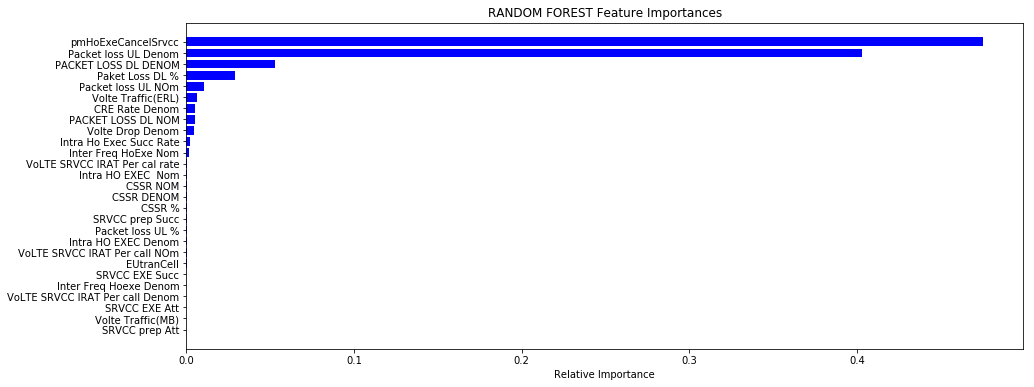

In [22]:
importances = RF.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
f, ax = plt.subplots(figsize=(15, 6))
plt.title('RANDOM FOREST Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
feature_names = data1.columns.values 
print(data1.columns.values)
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel('Relative Importance')
plt.show()
